# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
# TODO
max_price = ds.price.max()
most_expensive = ds[ds['price'] == max_price] # por si se repiten varios
print(f'The house with address {most_expensive["address"].iloc[0]} is the most expensive and its price is {max_price}')

The house with address El Escorial is the most expensive and its price is 8500000


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
# TODO
# Inicialmente se observa que muchos que tienen el precio 0, 
# como es poco probable que el precio de compra sea 0, se filtra
ds_non_zero = ds[ds.price > 0]
# Posteriormente, se observa en la descripción que el siguiente de 600 es un alquiler
min_price_rent = ds_non_zero.price.min()  # minimo alquiler
cheapest_rent_house = ds_non_zero[ds_non_zero['price'] == min_price_rent]
cheapest_rent_house['description']
# Se quitan todos los que en la descripción tengan "alquil"
ds_filtered = ds_non_zero[~ds_non_zero['description'].str.contains("alquil", case=False, na=False)]
min_price_rent = ds_filtered.price.min()
cheapest_house_rent = ds_filtered[ds_filtered['price'] == min_price_rent]
cheapest_house_rent['description']
# Se observan duplicados, se procede a eliminarlos entendiendo que si la descripción está duplicada, todo lo estará
ds_clean = ds_filtered.drop_duplicates(subset='description')
min_price = ds_clean.price.min()
cheapest_house = ds_clean[ds_clean['price'] == min_price]


print(f'The house with addres is {cheapest_house["address"].iloc[0]} the cheapest and its price is {min_price}')


The house with addres is Mayor, Los Santos de la Humosa the cheapest and its price is 16200


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [4]:
# TODO
# Smallest house
min_surface = ds.surface.min()
min_surface_address = ds[ds['surface'] == min_surface]
print(f'The smallest house is located on {min_surface_address.address.iloc[0]} and its surface is {min_surface}')
# Biggest house
max_surface = ds.surface.max()
max_surface_address = ds[ds['surface'] == max_surface]
print(f'The biggest house is located on {max_surface_address.address.iloc[0]} and its surface is {max_surface}')

The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0
The biggest house is located on Sevilla la Nueva and its surface is 249000.0


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [17]:
# TODO
#ds.head(5)
ds.columns
populations = ds.groupby('level5')
populations = populations.level5.value_counts().index
concat = ""


print(concat)

(' Madrid Capital', ' Madrid Capital'),('Ajalvir', 'Ajalvir'),('Alcalá de Henares', 'Alcalá de Henares'),('Alcobendas', 'Alcobendas'),('Alcorcón', 'Alcorcón'),('Aldea del Fresno', 'Aldea del Fresno'),('Algete', 'Algete'),('Alpedrete', 'Alpedrete'),('Ambite', 'Ambite'),('Anchuelo', 'Anchuelo'),('Aranjuez', 'Aranjuez'),('Arganda del Rey', 'Arganda del Rey'),('Arroyomolinos (Madrid)', 'Arroyomolinos (Madrid)'),('Batres', 'Batres'),('Becerril de la Sierra', 'Becerril de la Sierra'),('Belmonte de Tajo', 'Belmonte de Tajo'),('Boadilla del Monte', 'Boadilla del Monte'),('Braojos', 'Braojos'),('Brea de Tajo', 'Brea de Tajo'),('Brunete', 'Brunete'),('Buitrago del Lozoya', 'Buitrago del Lozoya'),('Bustarviejo', 'Bustarviejo'),('Cabanillas de la Sierra', 'Cabanillas de la Sierra'),('Cadalso de los Vidrios', 'Cadalso de los Vidrios'),('Camarma de Esteruelas', 'Camarma de Esteruelas'),('Campo Real', 'Campo Real'),('Canencia', 'Canencia'),('Carabaña', 'Carabaña'),('Casarrubuelos', 'Casarrubuelos'),(

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
# TODO
nan = ds.isna()
nan

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


Si que contiene NAs

In [8]:
# Numero total de Na por columna
nan_sum = ds.isna().sum()
nan_sum

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [9]:
# TODO
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [10]:
# limpiamos las 2 columnas que todo es NA
ds_cleaned_columns = ds.dropna(axis=1, how='all') 
ds_cleaned_columns
# limpiamos las columnas que no tienen al menos 9000 valores NO nulos
ds_cleaned_thresh = ds_cleaned_columns.dropna(axis=1, thresh=9000) 
ds_cleaned_thresh



,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,0,0,"40,57444","-3,92124"
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,0,0,"40,36967","-3,48105"


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [11]:
# TODO
# Elimino los de precio 0
ds = ds[ds['price'] > 0]
ds_arroyomolinos = ds[ds.level5 == "Arroyomolinos (Madrid)"]
mean_arroy = ds_arroyomolinos['price'].mean()
print(round(mean_arroy,2))

298905.18


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

(array([ 4.,  3., 12.,  5., 10.,  3.,  9.,  4., 17.,  4.,  9.,  5., 15.,
        11.,  6.,  7.,  4.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.]),
 array([165338.        , 179160.06666667, 192982.13333333, 206804.2       ,
        220626.26666667, 234448.33333333, 248270.4       , 262092.46666667,
        275914.53333333, 289736.6       , 303558.66666667, 317380.73333333,
        331202.8       , 345024.86666667, 358846.93333333, 372669.        ,
        386491.06666667, 400313.13333333, 414135.2       , 427957.26666667,
        441779.33333333, 455601.4       , 469423.46666667, 483245.53333333,
        497067.6       , 510889.66666667, 524711.73333333, 538533.8       ,
        552355.86666667, 566177.93333333, 580000.        ]),
 <BarContainer object of 30 artists>)

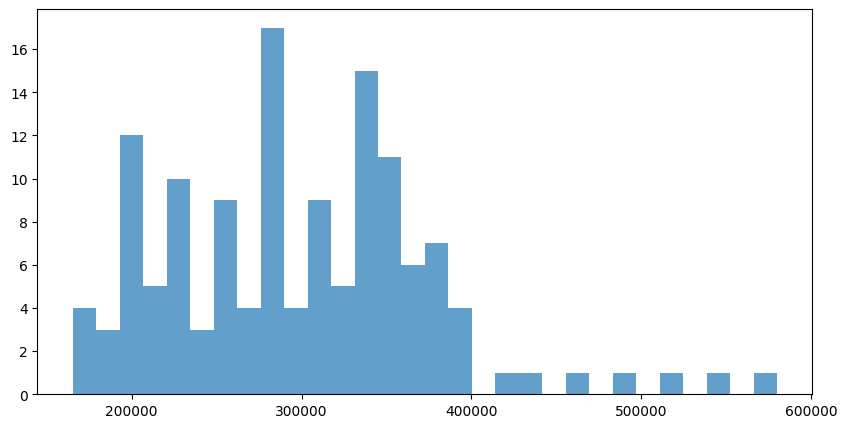

In [12]:
# TODO: Code
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.hist(ds_arroyomolinos['price'], bins = 30, alpha = 0.7)

In [13]:
ds_arroyomolinos['price'].describe()

count       135.000000
mean     298905.177778
std       76672.083974
min      165338.000000
25%      232450.000000
50%      294000.000000
75%      348950.000000
max      580000.000000
Name: price, dtype: float64

Se observa una mayor concentración de precios entre el mínimo de 165338 a los 400000. A excepción de algunas casas que son más caras, se encuentran casi todas cerca de la media.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [14]:
# TODO
import numpy as np
# VALDEMORILLO
ds_valdemorillo = ds[ds['level5'] == "Valdemorillo"]
ds_valdemorillo.drop_duplicates(subset="description") # Elimino duplicados
std_valdemorillo = np.std(ds_valdemorillo["price"], ddof=1) # Calculo la desviación típica de Valdemorillo
count_valdemorillo = ds_valdemorillo['price'].count()   # N número total de las muestras
error_estandar_valdemorillo = std_valdemorillo/np.sqrt(count_valdemorillo)  # error estandar
print("Media Valdemorillo:", round(ds_valdemorillo["price"].mean(),2))
print("Error estándar Valdemorillo:", round(error_estandar_valdemorillo,2))
# GALAPAGAR
ds_galapagar = ds.loc[ds['level5'] == "Galapagar"]
ds_galapagar = ds_galapagar.drop_duplicates(subset="description")   # Elimino duplicados
std_galapagar = np.std(ds_galapagar["price"], ddof=1)   # Calculo la desviación típica de Galapagar
count_galapagar = ds_galapagar['price'].count()     # N número total de las muestras
error_estandar_galapagar = std_galapagar/np.sqrt(count_galapagar)   # error estandar
print("Media Galapagar:", round(ds_galapagar["price"].mean(),2))
print("Error estándar Galapagar:", round(error_estandar_galapagar,2))


Media Valdemorillo: 363860.29
Error estándar Valdemorillo: 23757.82
Media Galapagar: 355417.45
Error estándar Galapagar: 21551.83


Si, son muy similares. Siendo Valdemorillo más caro.

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [15]:

ds_valdemorillo["pps"] = ds_valdemorillo["price"]/ds_valdemorillo['surface']


/tmp/ipykernel_648/2245586920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_valdemorillo["pps"] = ds_valdemorillo["price"]/ds_valdemorillo['surface']


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

In [7]:
# TODO: Code


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [17]:
# TODO

#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [18]:
# TODO

#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [19]:
# TODO

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

In [20]:
# TODO: Code

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [21]:
# TODO

#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [22]:
# TODO

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

In [23]:
# TODO

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [24]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [25]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [26]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
